# Aplikasi Korelasi

_dibuat berdasarkan https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial_

Berikut ini merupakan penjelasn singkat tentang penggunaan korelasi. Data yang digunakan adalah data bunga iris yang sudah tersedia dalam modul sklearn. Informasi yang terdapat dalam data adalah ukuran kelopak (sepal) dan mahkota (petal) yang merupakan variabel independen. Sepal menutupi petal dan umumnya berwatrna hijau dan seperti daun. Sementara petal seperti daun berwarna. Sementara kolom target yang merupakan variabel dependent berisi jenis iris yaitu Versicolor, Virginica, dan Setosa dan dinyatakan dalam angka dengan urutan 0,1, dan 2.  

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Berikut ini akan dilakukan korelasi antara panjang sepal dengan lebar sepal. Perintah fit_reg berguna untuk meniadakan garis regresi.

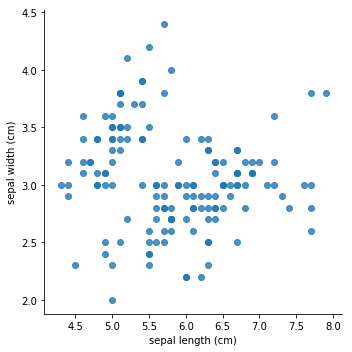

In [3]:
sns.lmplot(x='sepal length (cm)', y = 'sepal width (cm)',
          fit_reg = False, data=df_iris)

Apakah hubungan korelasi kedua parameter diatas positif atau negatif? Sekilas terlihat dari grafik di atas, hubungan dari kedua parameter tersebut adalah negatif. Artinya sepal length makin panjang sepal width cenderung menurun. Agar lebih jelas, kita beri warna sesuai jenisnya.

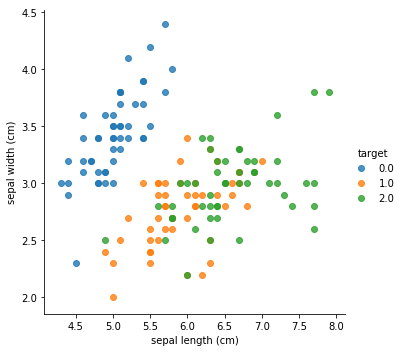

In [4]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', 
           fit_reg=False, data=df_iris, hue='target');

Ternyata setelah dibedakan sesuai jenis bunganya, hubungan kedua parameter tersebut menjadi positif untuk masing-masing jenis bunga. Artinya semakin panjang sepal semakin lebar juga sepalnya. Grafik tersebut menunjukkan bahwa salah satu cara untuk melihat korelasi adalah dengan memvisualisasikan data. Tapi jika ingin mengkuantifikasi korelasinya harus menggunakan koefisien korelasi.

In [5]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Terbukti bahwa untuk semua populasi, korelasi panjang sepal dan lebar sepal adalah negatif (-0.11757) akan tetapi berkorelasi positif untuk setiap spesies (0,782561). Kasus ini masuk kedalam paradox simpson (http://ftp.cs.ucla.edu/pub/stat_ser/r414.pdf). 

Mari kita telaah lebih jauh lagi. Hitung koefisien korelasi untuk masing-masing jenis bunga iris. 

In [6]:
df_iris.groupby(['target']).corr()

petal length (cm)  petal width (cm)  \
target                                                          
0.0    petal length (cm)           1.000000          0.331630   
       petal width (cm)            0.331630          1.000000   
       sepal length (cm)           0.267176          0.278098   
       sepal width (cm)            0.177700          0.232752   
1.0    petal length (cm)           1.000000          0.786668   
       petal width (cm)            0.786668          1.000000   
       sepal length (cm)           0.754049          0.546461   
       sepal width (cm)            0.560522          0.663999   
2.0    petal length (cm)           1.000000          0.322108   
       petal width (cm)            0.322108          1.000000   
       sepal length (cm)           0.864225          0.281108   
       sepal width (cm)            0.401045          0.537728   

                          sepal length (cm)  sepal width (cm)  
target                                                         
0.0    petal length (cm)           0.267176          0.177700  
       petal width (cm)            0.278098          0.232752  
       sepal length (cm)           1.000000          0.742547  
       sepal width (cm)            0.742547          1.000000  
1.0    petal length (cm)           0.754049          0.560522  
       petal width (cm)            0.546461          0.663999  
       sepal length (cm)           1.000000          0.525911  
       sepal width (cm)            0.525911          1.000000  
2.0    petal length (cm)           0.864225          0.401045  
       petal width (cm)            0.281108          0.537728  
       sepal length (cm)           1.000000          0.457228  
       sepal width (cm)            0.457228          1.000000

Dari matrik di atas, terlihat bahwa:
- Untuk target 0, sepal length dan sepal width mempunyai koefisien korelasi 0.75
- untuk target 1 adalah 0.5 dan
- untuk target 2 adalah 0.46

Dengan menganalisis data secara teliti, kita jadi lebih yakin tentang sifat dari data yang kita punya.